<a href="https://colab.research.google.com/github/navyakarna/PYTORCH_CV/blob/main/regression_model_in_pytorch_using_sgdm_and_adam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [3]:
df = pd.read_csv("/content/Bank of Trust Dataset.csv")
df.head()
# load the data

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
columns_with_nans = df.columns[df.isna().any()].tolist()

print("columns with NaNs:", columns_with_nans)
print("LNumber of columns with nans:", len(columns_with_nans))


#print the nmaes of the columns with NaNs

columns with NaNs: ['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq']
LNumber of columns with nans: 34


In [5]:
numeric_columns = ['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun', 'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim', 'personal_loan_active', 'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed', 'investment_1', 'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr', 'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may', 'credit_count_may', 'debit_count_may', 'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun', 'loan_enq']

df[numeric_columns] = df[numeric_columns].fillna(0)

#fill the Nan's with 0

In [6]:
columns_with_nans = df.columns[df.isna().any()].tolist()

print("columns with NaNs:", columns_with_nans)
print("LNumber of columns with nans:", len(columns_with_nans))

#print the coulmns to check again


columns with NaNs: []
LNumber of columns with nans: 0


In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop('cc_cons', axis= 1)
Y = df['cc_cons'] # we dropped cc_cons , cause its our target variable

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['account_type' , 'gender', 'loan_enq']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # we used one hot encoding here



preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print(X_train.head(2))


          id account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
12665  29125      current      M   40          424     20011.05          0.0   
20050  22432      current      M   22          723      9859.00       3473.0   

       cc_cons_may  dc_cons_may  cc_cons_jun  ...  credit_count_may  \
12665      7665.48      19991.0      11681.0  ...               3.0   
20050      1037.00       1187.0       5612.5  ...               2.0   

       debit_count_may  max_credit_amount_may  debit_amount_jun  \
12665             16.0                41000.0          62879.04   
20050             11.0                16901.0          26597.51   

       credit_amount_jun  credit_count_jun  debit_count_jun  \
12665           53597.93               6.0             14.0   
20050            7612.00               4.0             15.0   

       max_credit_amount_jun  loan_enq  emi_active  
12665                48000.0         0      1474.3  
20050                 5000.0         0         

In [9]:
Y_train.head()

,cc_cons
12665,620
20050,372
893,1943
21491,881
21726,32020


In [10]:
# Before applying OneHotEncoder, ensure all categorical features are of type string
for feature in categorical_features:
    X_train[feature] = X_train[feature].astype(str)
    X_test[feature] = X_test[feature].astype(str)

# Now, proceed with the preprocessing steps
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train[:2]

array([[ 0.41790163,  0.4745146 , -0.69416884,  0.1361498 , -0.29384331,
        -0.29183089,  1.69499864,  0.17088608, -0.25094642,  0.7182671 ,
         0.08670607,  1.4641179 , -0.46561127,  0.51434489,  0.11224179,
        -0.32097467, -0.30053314, -0.16231651, -0.31103353, -0.22952608,
        -0.03597118, -0.09708223, -0.08974727, -0.07060041,  0.06925065,
         0.16428121,  0.92651539, -0.45717374,  0.04908393,  0.04821203,
        -0.15356069, -0.21744647,  0.25178783, -0.03094002, -0.03885138,
        -0.08091006,  0.10020071, -0.09427075,  0.05936268, -0.03039879,
         1.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ],
       [-0.07777052, -1.62230825,  0.89441764, -0.27413141,  0.12727036,
        -0.58731224, -0.14295897, -0.216256  , -0.14192995, -0.59589067,
        -0.84069138, -0.81919138,  0.59388377, -0.15915283, -0.01792696,
        -0.74445332, -0.30053314, -0.16231651, -0.31103353, -0.22952608,
        -0.03597118, -0.09708

In [11]:
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values.reshape(-1,1), dtype=torch.float32)

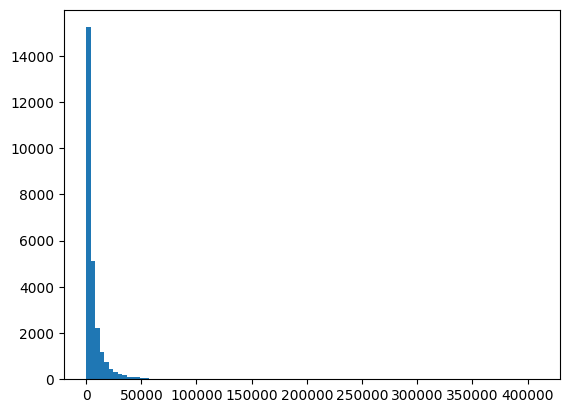

In [12]:
import matplotlib.pyplot as plt
plt.hist(Y_train_tensor, bins=100)
plt.show()

In [1]:
# define a custom root mean logarithmic error function
def rmsle(y_pred, y_true):

  #ensure that predictions are positive + 1 to avoid log(0)
  y_pred = torch.clamp(y_pred, min=0) + 1
  y_true = torch.clamp(y_true, min=0) + 1


  #calcualte the log and compute the squared difference
  log_pred = torch.log(y_pred)
  log_true = torch.log(y_true)

  return torch.sqrt(torch.mean((log_pred - log_true)**2))


  #compute mean of squared log error and take square root
  mean_squared_log_error = torch.mean(squared_log_error)
  rmsle = torch.sqrt(mean_squared_log_error)



In [2]:
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset , DataLoader
import torch.optim as optim

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the three linear layers
        self.fc1 = nn.Linear(X_test_tensor.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64,32)
        self.fc4 = nn.Linear(32,1)

    def forward(self, x):
        # Pass x through linear layers adding activations
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

In [19]:
train_data = TensorDataset(X_train_tensor, Y_train_tensor)

In [24]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 0.001, momentum=0.9)
train_loss_list=[]
test_loss_list = []
num_epochs = 30
train_loader = DataLoader(train_data, batch_size= 64, shuffle=True)
# Execute the training loop
for epoch in range(num_epochs): # increasing the epochs for effective training
    for X_batch, y_batch in train_loader:
        # Forward pass
        pred = model(X_batch)
        loss = rmsle(pred, y_batch)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss = rmsle(model(X_train_tensor), Y_train_tensor).item()
        # print(epoch,': ', train_loss)
    test_loss = rmsle(model(X_test_tensor), Y_test_tensor).item()
    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    if (epoch+1) % 5 == 0: # printing after every 100 epochs
        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')


Epoch 5: Train Loss: 1.5352, Test Loss: 1.5499
Epoch 10: Train Loss: 1.3226, Test Loss: 1.3395
Epoch 15: Train Loss: 1.3150, Test Loss: 1.3297
Epoch 20: Train Loss: 1.3145, Test Loss: 1.3272
Epoch 25: Train Loss: 1.3143, Test Loss: 1.3256
Epoch 30: Train Loss: 1.3141, Test Loss: 1.3242


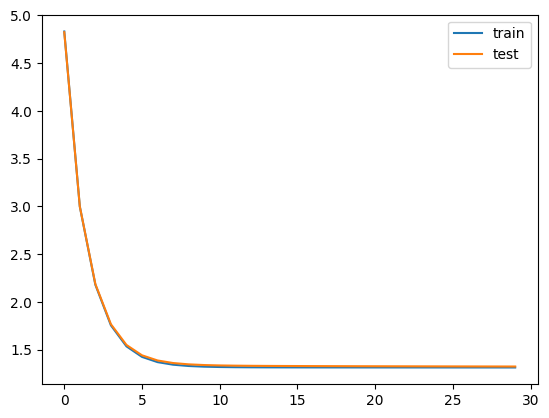

In [25]:
plt.plot(range(num_epochs),train_loss_list, label = 'train')
plt.plot(range(num_epochs),test_loss_list, label = 'test')
plt.legend()
plt.show()

as we could see , the train and test loss is almost same , and decreased after 5 epochs , so now what we do is we will use a bigger network and adam instead of sgd with momentum.